Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bikedf = pd.read_csv('bikedf.csv')
locationdf = pd.read_csv('locationdf.csv')

In [32]:
#created condensed df with sum of boolians to determine how many bars, restaurants and POI there are for every bikestop
locationnumber = locationdf.groupby(by='bikestop').sum()
locationnumber = locationnumber.drop(columns = ['distance','postcode','rating','category1','category2','category3'])

barreviews = locationdf[locationdf['Bar']==True].groupby(by='bikestop').mean()
barreviews = barreviews.drop(columns = ['distance','postcode','review_count','category1','category2','category3','Bar','POI','Restaurant'])
barreviews = barreviews.rename(columns={'rating':'avg_bar_rating'})

poireviews = locationdf[locationdf['POI']==True].groupby(by='bikestop').mean()
poireviews  = poireviews .drop(columns = ['distance','postcode','review_count','category1','category2','category3','POI','Bar','Restaurant'])
poireviews = poireviews.rename(columns={'rating':'avg_poi_rating'})

restreviews = locationdf[locationdf['Restaurant']==True].groupby(by='bikestop').mean()
restreviews = restreviews.drop(columns = ['distance','postcode','review_count','category1','category2','category3','Bar','POI','Restaurant'])
restreviews = restreviews.rename(columns={'rating':'avg_restaurant_rating'})

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12272\1896353298.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  locationnumber = locationdf.groupby(by='bikestop').sum()
C:\Users\Andrew\AppData\Local\Temp\ipykernel_12272\1896353298.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barreviews = locationdf[locationdf['Bar']==True].groupby(by='bikestop').mean()
C:\Users\Andrew\AppData\Local\Temp\ipykernel_12272\1896353298.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

In [36]:
#add review averages to condensed df
locationnumber = locationnumber.merge(barreviews,on='bikestop')
locationnumber = locationnumber.merge(poireviews,on='bikestop')
locationnumber = locationnumber.merge(restreviews,on='bikestop')

In [37]:
locationnumber

,review_count,Bar,POI,Restaurant,avg_bar_rating,avg_poi_rating,avg_restaurant_rating
bikestop,,,,,,,
2112 W Peterson Ave,7924.0,10,7,55,3.900000,4.500000,3.822222
63rd St Beach,540.0,1,14,11,4.000000,2.625000,2.300000
900 W Harrison St,21015.0,28,13,60,4.083333,4.000000,4.106383
Aberdeen St & Jackson Blvd,51437.0,40,16,63,4.078947,4.125000,4.166667
Aberdeen St & Monroe St,50029.0,45,16,63,4.086957,4.100000,4.156250
...,...,...,...,...,...,...,...
Woodlawn Ave & 55th St,11736.0,14,26,49,3.722222,4.250000,3.822222
Woodlawn Ave & 75th St,442.0,8,10,36,3.250000,1.000000,2.271429
Woodlawn Ave & Lake Park Ave,2177.0,2,18,29,4.000000,3.900000,2.672414


In [40]:
#combine df together
fulldf = bikedf.merge(locationnumber,left_on='name',right_on='bikestop')

In [41]:
fulldf

,name,address,freebikes,slots,latitude,longitude,ll,review_count,Bar,POI,Restaurant,avg_bar_rating,avg_poi_rating,avg_restaurant_rating
0,Ravenswood Ave & Lawrence Ave,NaN,0,31,41.969090,-87.674237,"41.9691,-87.6742",20595.0,25,14,58,4.272727,NaN,4.204082
1,Lake Park Ave & 56th St,NaN,11,31,41.793242,-87.587782,"41.7932,-87.5878",13483.0,18,20,51,3.750000,4.400000,3.811111
2,Ada St & Washington Blvd,NaN,8,31,41.882830,-87.661206,"41.8828,-87.6612",24753.0,43,18,58,4.000000,3.812500,4.081633
3,Ashland Ave & Grace St,NaN,4,31,41.950687,-87.668700,"41.9507,-87.6687",18450.0,52,18,62,4.038462,4.166667,4.125000
4,Clark St & Wrightwood Ave,NaN,12,31,41.929546,-87.643118,"41.9295,-87.6431",33825.0,41,10,70,4.153846,NaN,4.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,Indiana Ave & Roosevelt Rd,NaN,24,31,41.867888,-87.623041,"41.8679,-87.623",27845.0,20,16,57,3.916667,4.000000,3.916667
1348,Lincoln Ave & Byron St,NaN,4,31,41.952372,-87.677296,"41.9524,-87.6773",15322.0,39,11,60,4.138889,4.250000,4.177083
1349,Wentworth Ave & Cermak Rd*,NaN,12,31,41.853214,-87.631872,"41.8532,-87.6319",23790.0,15,17,55,4.500000,3.500000,4.010638
1350,Kedzie Ave & 24th St (Temp),NaN,0,31,41.846357,-87.704966,"41.8464,-87.705",2491.0,3,6,51,4.000000,NaN,3.670213


In [58]:
fulldf.to_csv('fulldf.csv',index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

array([[<Axes: title={'center': 'freebikes'}>,
        <Axes: title={'center': 'slots'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'review_count'}>,
        <Axes: title={'center': 'Bar'}>],
       [<Axes: title={'center': 'POI'}>,
        <Axes: title={'center': 'Restaurant'}>,
        <Axes: title={'center': 'avg_bar_rating'}>],
       [<Axes: title={'center': 'avg_poi_rating'}>,
        <Axes: title={'center': 'avg_restaurant_rating'}>, <Axes: >]],
      dtype=object)

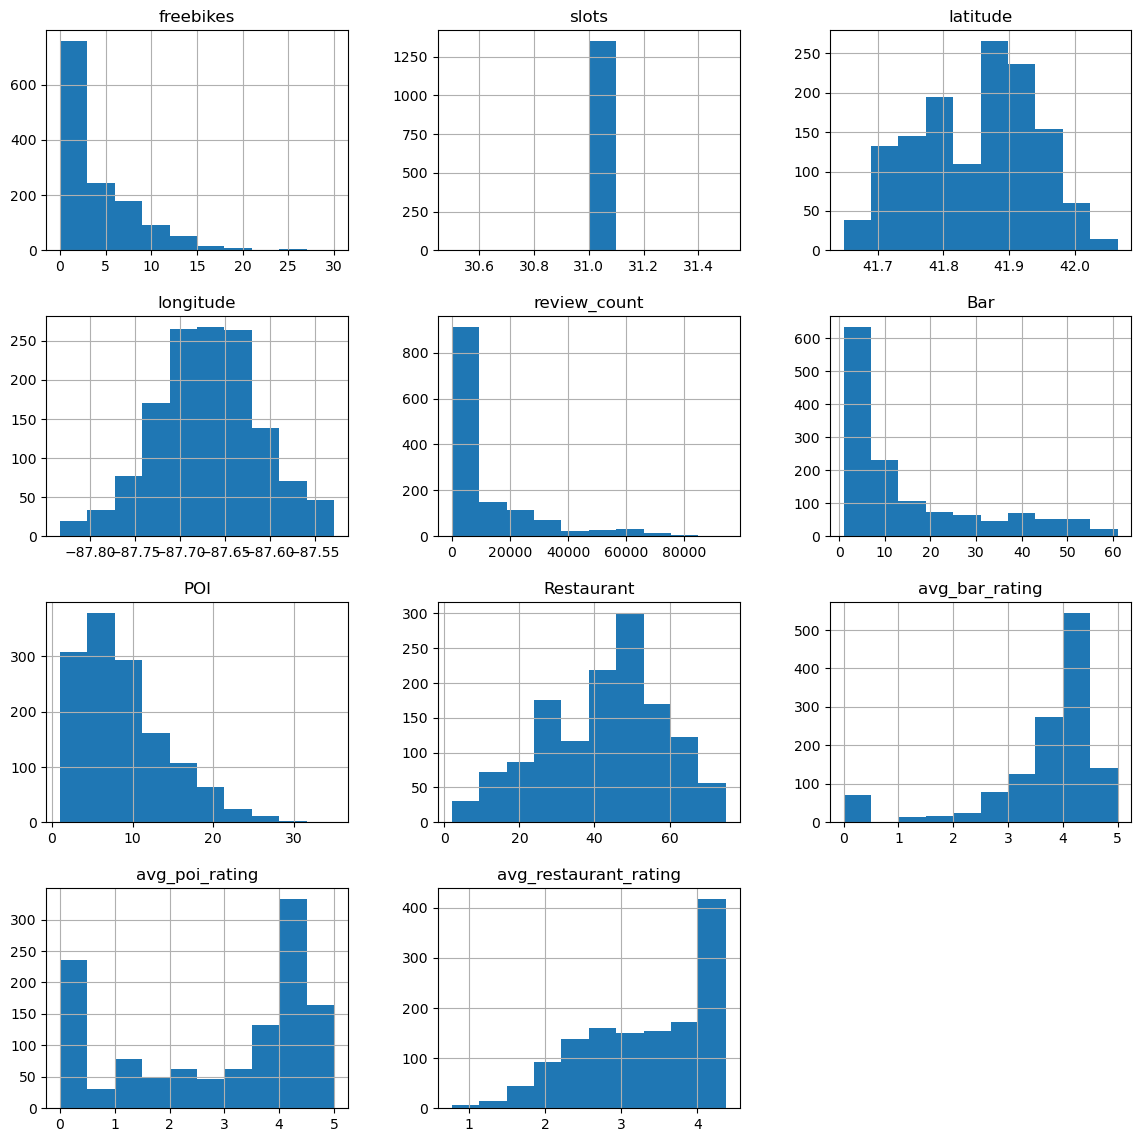

In [43]:
fulldf.hist(figsize = (14,14))

Looking at the above we see some interesting things. 1) There's a heavy sku to many of the variables, notably num bikes (rightward sku), reviewcount(rightward), number of POI(rightward) and bars(rightward), bar rating(leftward), poi rating (left but with a second pseudomode), and restaraurant rating (leftward). The ratings make sense as ratings tend to be high (3.5-5) so we wouldn't expect many places with 1-2 to still be open. Interestingly the number of restaurants looks somewhat normally distributed.

This probably means we're going to run into issues with normality later.

It's also interesting that every bike stop has the same number of slots, I'm not sure if that's an issue with the data or they are just very uniform. Either way it won't factor into my analysis.

In [52]:
corrmatrix = fulldf.drop(columns = ['slots','latitude','longitude']).corr()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12272\2769808804.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = fulldf.drop(columns = ['slots','latitude','longitude']).corr()


<Axes: >

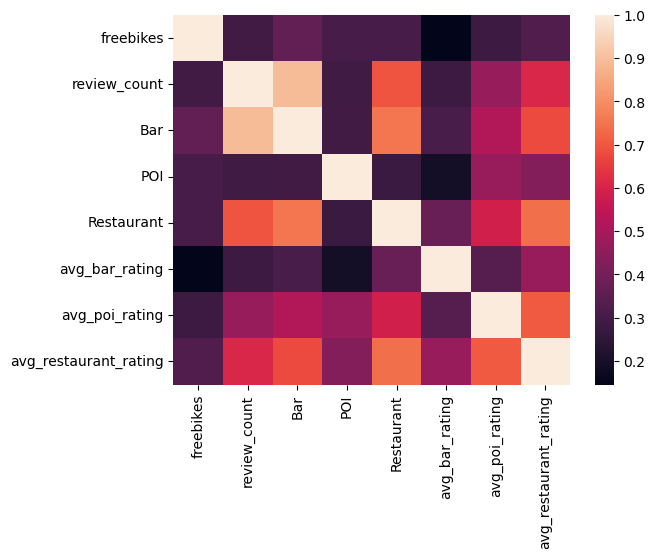

In [53]:
sns.heatmap(corrmatrix)

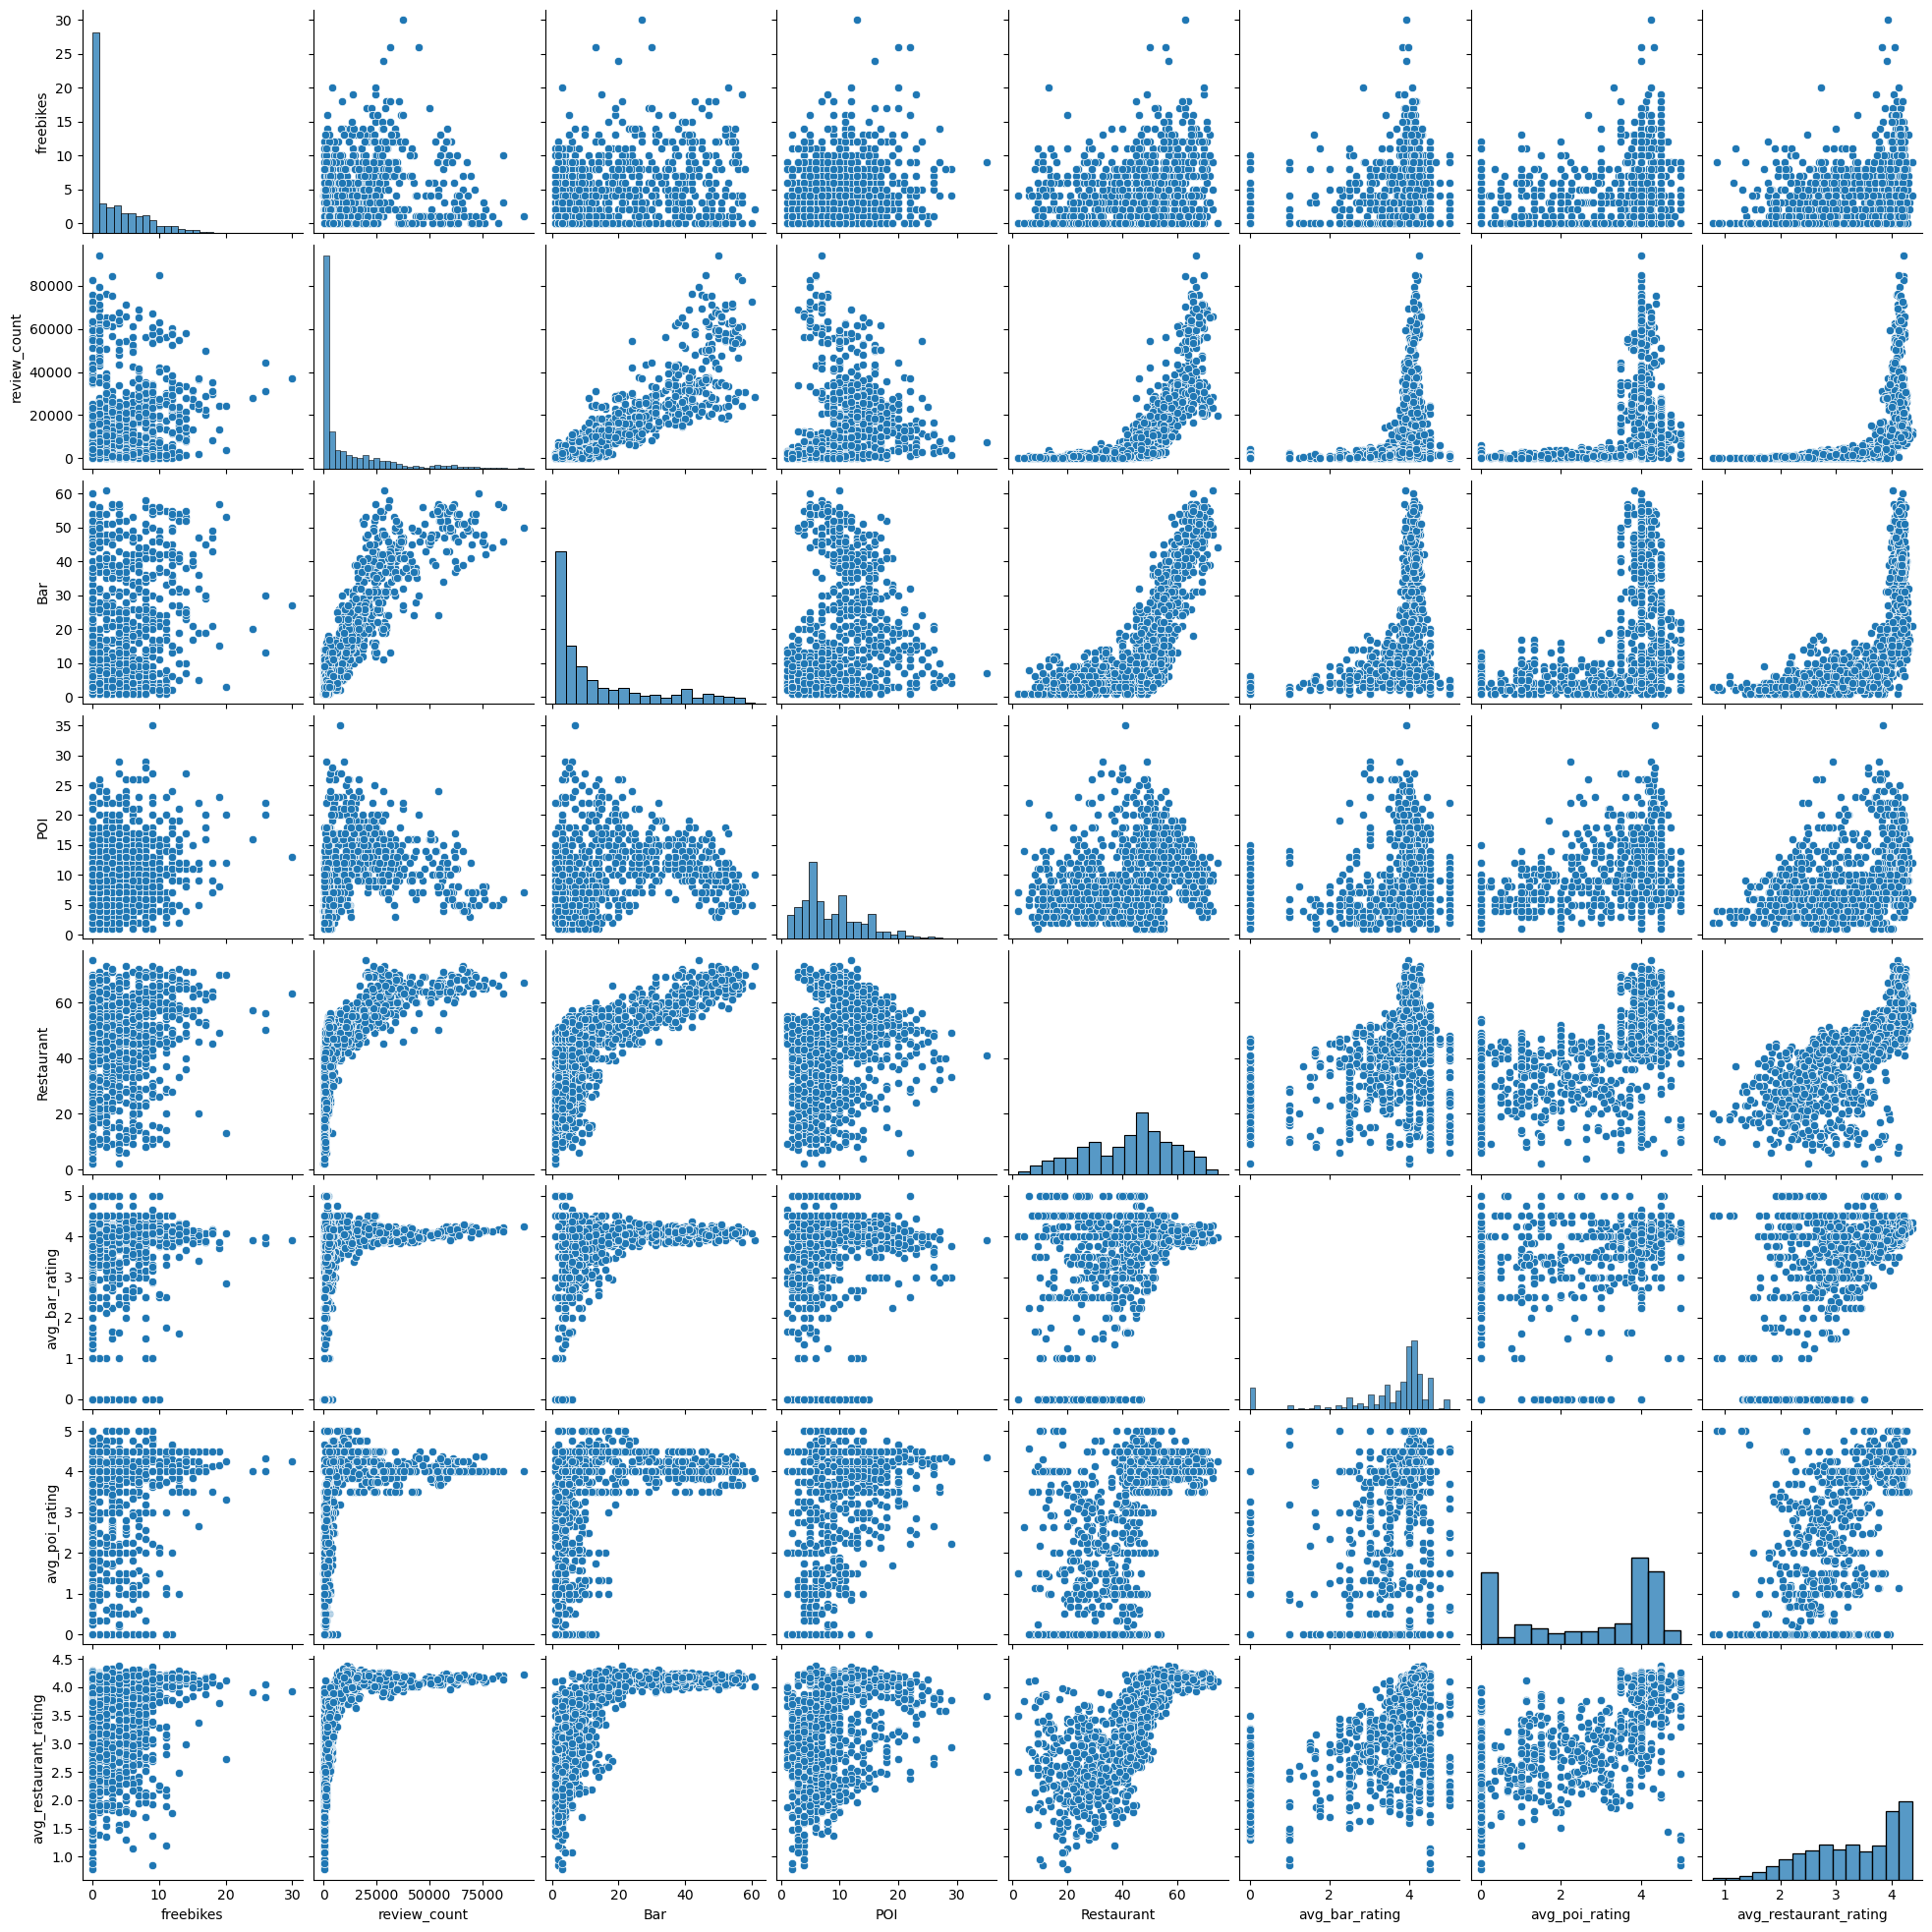

In [57]:
sns.pairplot(fulldf.drop(columns = ['slots','latitude','longitude']))
plt.show()

Looking through the chart above, there are very weak relationships with number of bikes and the other scroes. This is mostly down to the number of freebikes often being 0. It's hard to predict a variable that skus so close to 0. However, there are some decent relationships between the other variables.

I expect a weak model based on the above. Probably the proper thing to do would be to pull the bike data multiple times at different hours of the day and get an average number of bikes instead of using a single point in time. This might lead to some better r^2.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [75]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [132]:
connection = create_connection("bikedata.sqlite")

Connection to SQLite DB successful


In [133]:
def execute_query(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print('query executed')
    except Error as e:
        print(f"The error '{e}' occured")

In [135]:
# #create table for POI info per bikestop
# create_POI_table = """
# CREATE TABLE IF NOT EXISTS POI (
#   id INTEGER PRIMARY KEY AUTOINCREMENT,
#   bikestop TEXT,
#   Bar INTEGER,
#   POI INTEGER,
#   Restaurant INTEGER,
#   avg_bar_rating REAL,
#   avg_poi_rating REAL,
#   avg_restaurant_rating REAL,
#   FOREIGN KEY (bikestop) REFERENCES bikestop (name)
# );
# """

In [136]:
# #create table for list of all POI
# create_locations_table = """
# CREATE TABLE IF NOT EXISTS POI (
#   name TEXT PRIMARY KEY,
#   distance REAL,
#   bikestop TEXT,
#   local_address TEXT,
#   postcode INTEGER,
#   rating REAL,
#   review_count INTEGER,
#   category1name	TEXT,
#   category2name	TEXT,
#   category3name	TEXT,
#   Bar INTEGER,
#   POI INTEGER,
#   Restaurant INTEGER,
#   FOREIGN KEY (bikestop) REFERENCES bikestop (name)
# );
# """

In [140]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [144]:
fulldf.to_sql('fulldf',connection,if_exists='append')

1352

In [194]:
drop_tables = """
DROP TABLE locations;
"""

In [195]:
execute_query(connection,drop_tables)

query executed


In [153]:
#create table for bikestop data
create_bikestop_table = """
CREATE TABLE bikestops
AS SELECT
name, address, freebikes, slots, latitude, longitude
FROM fulldf;
"""

In [160]:
execute_query(connection,create_bikestop_table)

query executed


In [189]:
#create table for bikestop data
create_poi_table = """
CREATE TABLE poi
AS SELECT
name as bikestop,
review_count,
Bar,
POI,
Restaurant,
avg_bar_rating,
avg_poi_rating,
avg_restaurant_rating
FROM fulldf;
"""

In [190]:
execute_query(connection,create_poi_table)

query executed


In [191]:
locationdf = pd.read_csv('locationdf.csv')
locationdf.to_sql('locationdf',connection,if_exists='replace')

77078

In [196]:
#create table for location data
create_locations_table = """
CREATE TABLE locations
AS SELECT
*
FROM locationdf;
"""

In [197]:
execute_query(connection,create_locations_table)

query executed


Look at the data before and after the join to validate your data.

In [198]:
test_bikestop = "SELECT COUNT(*) FROM bikestops"

In [199]:
execute_read_query(connection,test_bikestop)

[(1352,)]

In [200]:
test_locations = "SELECT COUNT(*) FROM locations"
execute_read_query(connection,test_locations)

[(77078,)]

In [205]:
test_poi = "SELECT COUNT(*) FROM poi"
execute_read_query(connection,test_poi)

[(1352,)]

In [206]:
# lengths all conform

In [208]:
select_bikestops = "SELECT * from bikestops"
bikestops = execute_read_query(connection, select_bikestops)

for stop in bikestops:
    print(stop)

('Ravenswood Ave & Lawrence Ave', None, 0, 31, 41.96909, -87.674237)
('Lake Park Ave & 56th St', None, 11, 31, 41.793242, -87.587782)
('Ada St & Washington Blvd', None, 8, 31, 41.88283, -87.661206)
('Ashland Ave & Grace St', None, 4, 31, 41.950687, -87.6687)
('Clark St & Wrightwood Ave', None, 12, 31, 41.929546, -87.643118)
('Adler Planetarium', None, 20, 31, 41.866095, -87.607267)
('Wolcott Ave & Polk St', None, 0, 31, 41.871262, -87.673688)
('Racine Ave & Wrightwood Ave', None, 9, 31, 41.928887, -87.658971)
('Halsted St & Wrightwood Ave', None, 8, 31, 41.929143, -87.649077)
('Western Blvd & 48th Pl', None, 8, 31, 41.805661, -87.683392)
('Keystone Ave & Fullerton Ave', None, 10, 31, 41.92459, -87.72785)
('Halsted St & Roscoe St', None, 14, 31, 41.94367, -87.64895)
('Broadway & Belmont Ave', None, 18, 31, 41.940106, -87.645451)
('Paulina St & Montrose Ave', None, 0, 31, 41.961507, -87.671387)
('Broadway & Berwyn Ave', None, 11, 31, 41.978353, -87.659753)
('Broadway & Argyle St', None, 

In [209]:
select_poi = "SELECT * from poi"
poi = execute_read_query(connection, select_poi)

for p in poi:
    print(p)

('Ravenswood Ave & Lawrence Ave', 20595.0, 25, 14, 58, 4.2727272727272725, None, 4.204081632653061)
('Lake Park Ave & 56th St', 13483.0, 18, 20, 51, 3.75, 4.4, 3.811111111111111)
('Ada St & Washington Blvd', 24753.0, 43, 18, 58, 4.0, 3.8125, 4.081632653061225)
('Ashland Ave & Grace St', 18450.0, 52, 18, 62, 4.038461538461538, 4.166666666666667, 4.125)
('Clark St & Wrightwood Ave', 33825.0, 41, 10, 70, 4.153846153846154, None, 4.2)
('Adler Planetarium', 3724.0, 3, 20, 13, 2.8333333333333335, 3.3181818181818183, 2.730769230769231)
('Wolcott Ave & Polk St', 7819.0, 8, 8, 52, 3.7857142857142856, 4.5, 3.734042553191489)
('Racine Ave & Wrightwood Ave', 34387.0, 43, 10, 63, 4.176470588235294, None, 4.212765957446808)
('Halsted St & Wrightwood Ave', 33690.0, 49, 8, 70, 4.105263157894737, None, 4.15)
('Western Blvd & 48th Pl', 588.0, 3, 3, 44, 3.0, 0.0, 3.272727272727273)
('Keystone Ave & Fullerton Ave', 4711.0, 11, 7, 50, 3.75, 4.125, 4.031914893617022)
('Halsted St & Roscoe St', 27792.0, 53, 

In [213]:
select_locations = "SELECT * from locations"
locations = execute_read_query(connection, select_locations)
i = 0
for local in locations:
    print(local)
    i+=1
    if i == 50:
        break

(0, 'The Warbler', 1075.6688285579871, 'Ravenswood Ave & Lawrence Ave', '4535 N Lincoln Ave', 60625.0, 4.5, 415.0, 'Pasta Shops', 'Chicken Wings', 'Sandwiches', None, None, None, 0, 0, 1)
(1, 'Cinco Mexican Kitchen', 79.2579656166328, 'Ravenswood Ave & Lawrence Ave', '1758 W Lawrence Ave', 60640.0, 4.5, 57.0, 'Cocktail Bars', 'Tacos', 'Empanadas', None, None, None, 1, 0, 1)
(2, 'Gather', 1071.5302898331438, 'Ravenswood Ave & Lawrence Ave', '4539 N Lincoln Ave', 60625.0, 4.5, 980.0, 'Wine Bars', 'American (New)', None, None, None, None, 1, 0, 1)
(3, 'XOchimilco Mexican Restaurant', 963.5903457888188, 'Ravenswood Ave & Lawrence Ave', '2030-32 W Montrose Ave', 60618.0, 5.0, 267.0, 'Mexican', None, None, None, None, None, 0, 0, 1)
(4, 'Bar Roma', 787.5853303422341, 'Ravenswood Ave & Lawrence Ave', '5101 N Clark St', 60640.0, 4.5, 370.0, 'Bars', 'Italian', None, None, None, None, 1, 0, 1)
(5, 'CoCo Vietnamese Sandwiches & Pho', 335.1860421793525, 'Ravenswood Ave & Lawrence Ave', '1613 W Law

In [ ]:
#data form conforms to tables and first 50 values match